In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
heart = pd.read_csv('../data/heart2.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin,hereditary
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,20-40,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-60,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,20-40,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-60,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,40-60,0


### Create features and dummies, and then split and scale the data

In [3]:
feat = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'hereditary']
X = heart[feat]
y = heart.HeartDisease

In [4]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

In [5]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Setup Pycaret classification model

In [6]:
# import pycaret classification and init setup
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s = setup(heart, target = 'HeartDisease', session_id=1720)

,Description,Value
0,Session id,1720
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 14)"
4,Transformed data shape,"(918, 23)"
5,Transformed train set shape,"(642, 23)"
6,Transformed test set shape,"(276, 23)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,6


### Determine Optimal Model

In [7]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8723,0.0000,0.8929,0.8794,0.8851,0.7412,0.7437,0.0660
lr,Logistic Regression,0.8707,0.9245,0.8958,0.8754,0.8842,0.7377,0.7412,0.4400
lda,Linear Discriminant Analysis,0.8692,0.9264,0.8929,0.8745,0.8826,0.7347,0.7375,0.0730
catboost,CatBoost Classifier,0.8691,0.9254,0.8985,0.8724,0.8839,0.7338,0.7377,0.1540
rf,Random Forest Classifier,0.8644,0.9264,0.8985,0.8650,0.8798,0.7243,0.7289,0.0960
gbc,Gradient Boosting Classifier,0.8597,0.9239,0.8901,0.8643,0.8754,0.7148,0.7197,0.0850
et,Extra Trees Classifier,0.8582,0.9150,0.8926,0.8583,0.8739,0.7117,0.7160,0.0880
ada,Ada Boost Classifier,0.8535,0.9096,0.8587,0.8762,0.8660,0.7041,0.7072,0.0880
lightgbm,Light Gradient Boosting Machine,0.8363,0.9110,0.8645,0.8461,0.8540,0.6677,0.6707,0.1650
nb,Naive Bayes,0.8210,0.9162,0.7492,0.9128,0.8197,0.6459,0.6611,0.0780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1720, solver='auto',
                tol=0.0001)

###  Tune Hyperparameters with Pycaret

In [9]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.0000,0.8333,0.8824,0.8571,0.6908,0.6921
1,0.8923,0.0000,0.8889,0.9143,0.9014,0.7828,0.7832
2,0.9219,0.0000,1.0000,0.8780,0.9351,0.8381,0.8493
3,0.8281,0.0000,0.8333,0.8571,0.8451,0.6522,0.6525
4,0.8906,0.0000,0.9167,0.8919,0.9041,0.7769,0.7773
5,0.9375,0.0000,0.9143,0.9697,0.9412,0.8746,0.8764
6,0.8594,0.0000,0.9143,0.8421,0.8767,0.7137,0.7170
7,0.8438,0.0000,0.8857,0.8378,0.8611,0.6829,0.6842
8,0.8438,0.0000,0.8286,0.8788,0.8529,0.6866,0.6879


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate Model with necessary vizualizations

In [10]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

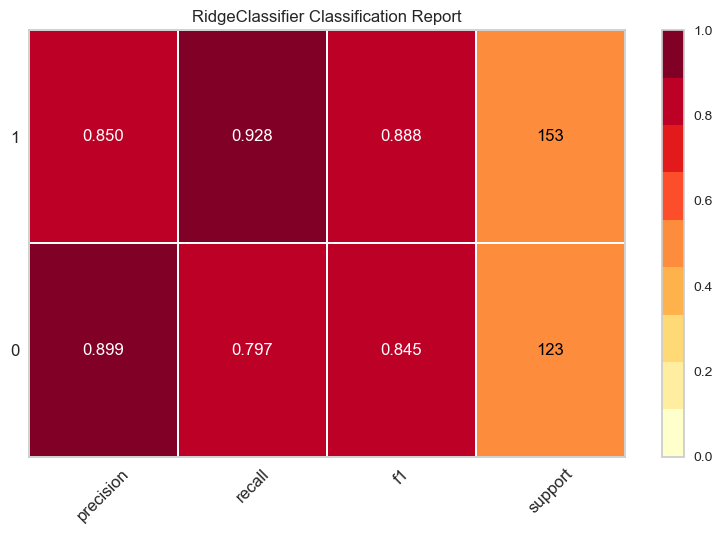

In [11]:
s.plot_model(best, plot = 'class_report')

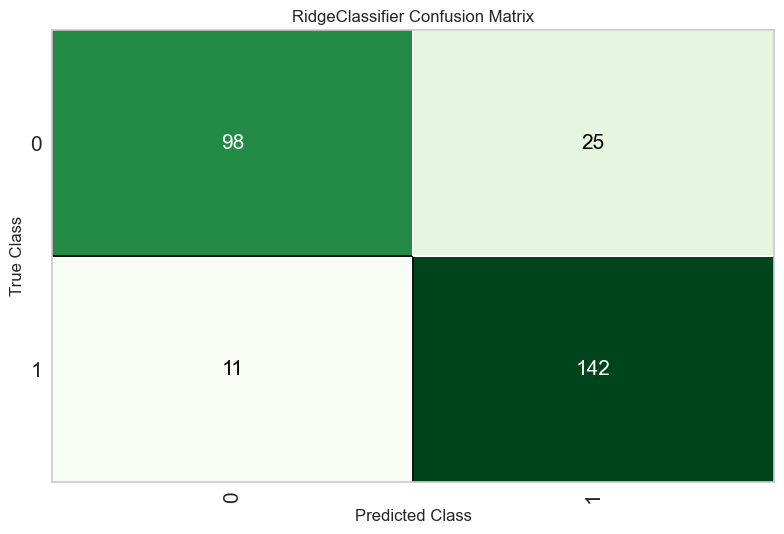

In [12]:
s.plot_model(best, plot = 'confusion_matrix')

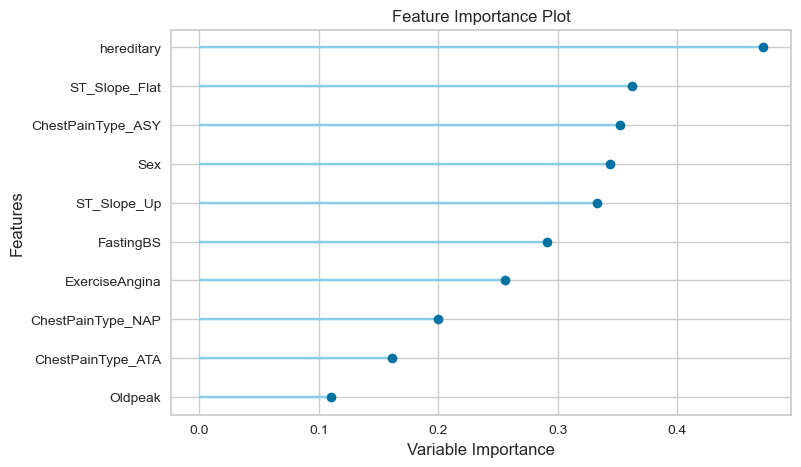

In [13]:
s.plot_model(best, plot = 'feature')